In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fftpack
import seaborn as sns

%matplotlib inline

Prepare the notebook by downloading the current.csv file. This way it can run on Google colab.

In [ ]:
cwd = Path.cwd() # current working directory
os.chdir(cwd)

# download current.csv into the main directory
!wget 'https://raw.githubusercontent.com/tvhahn/blog-snips/main/2020.10.07_data_driven_methods/current.csv'

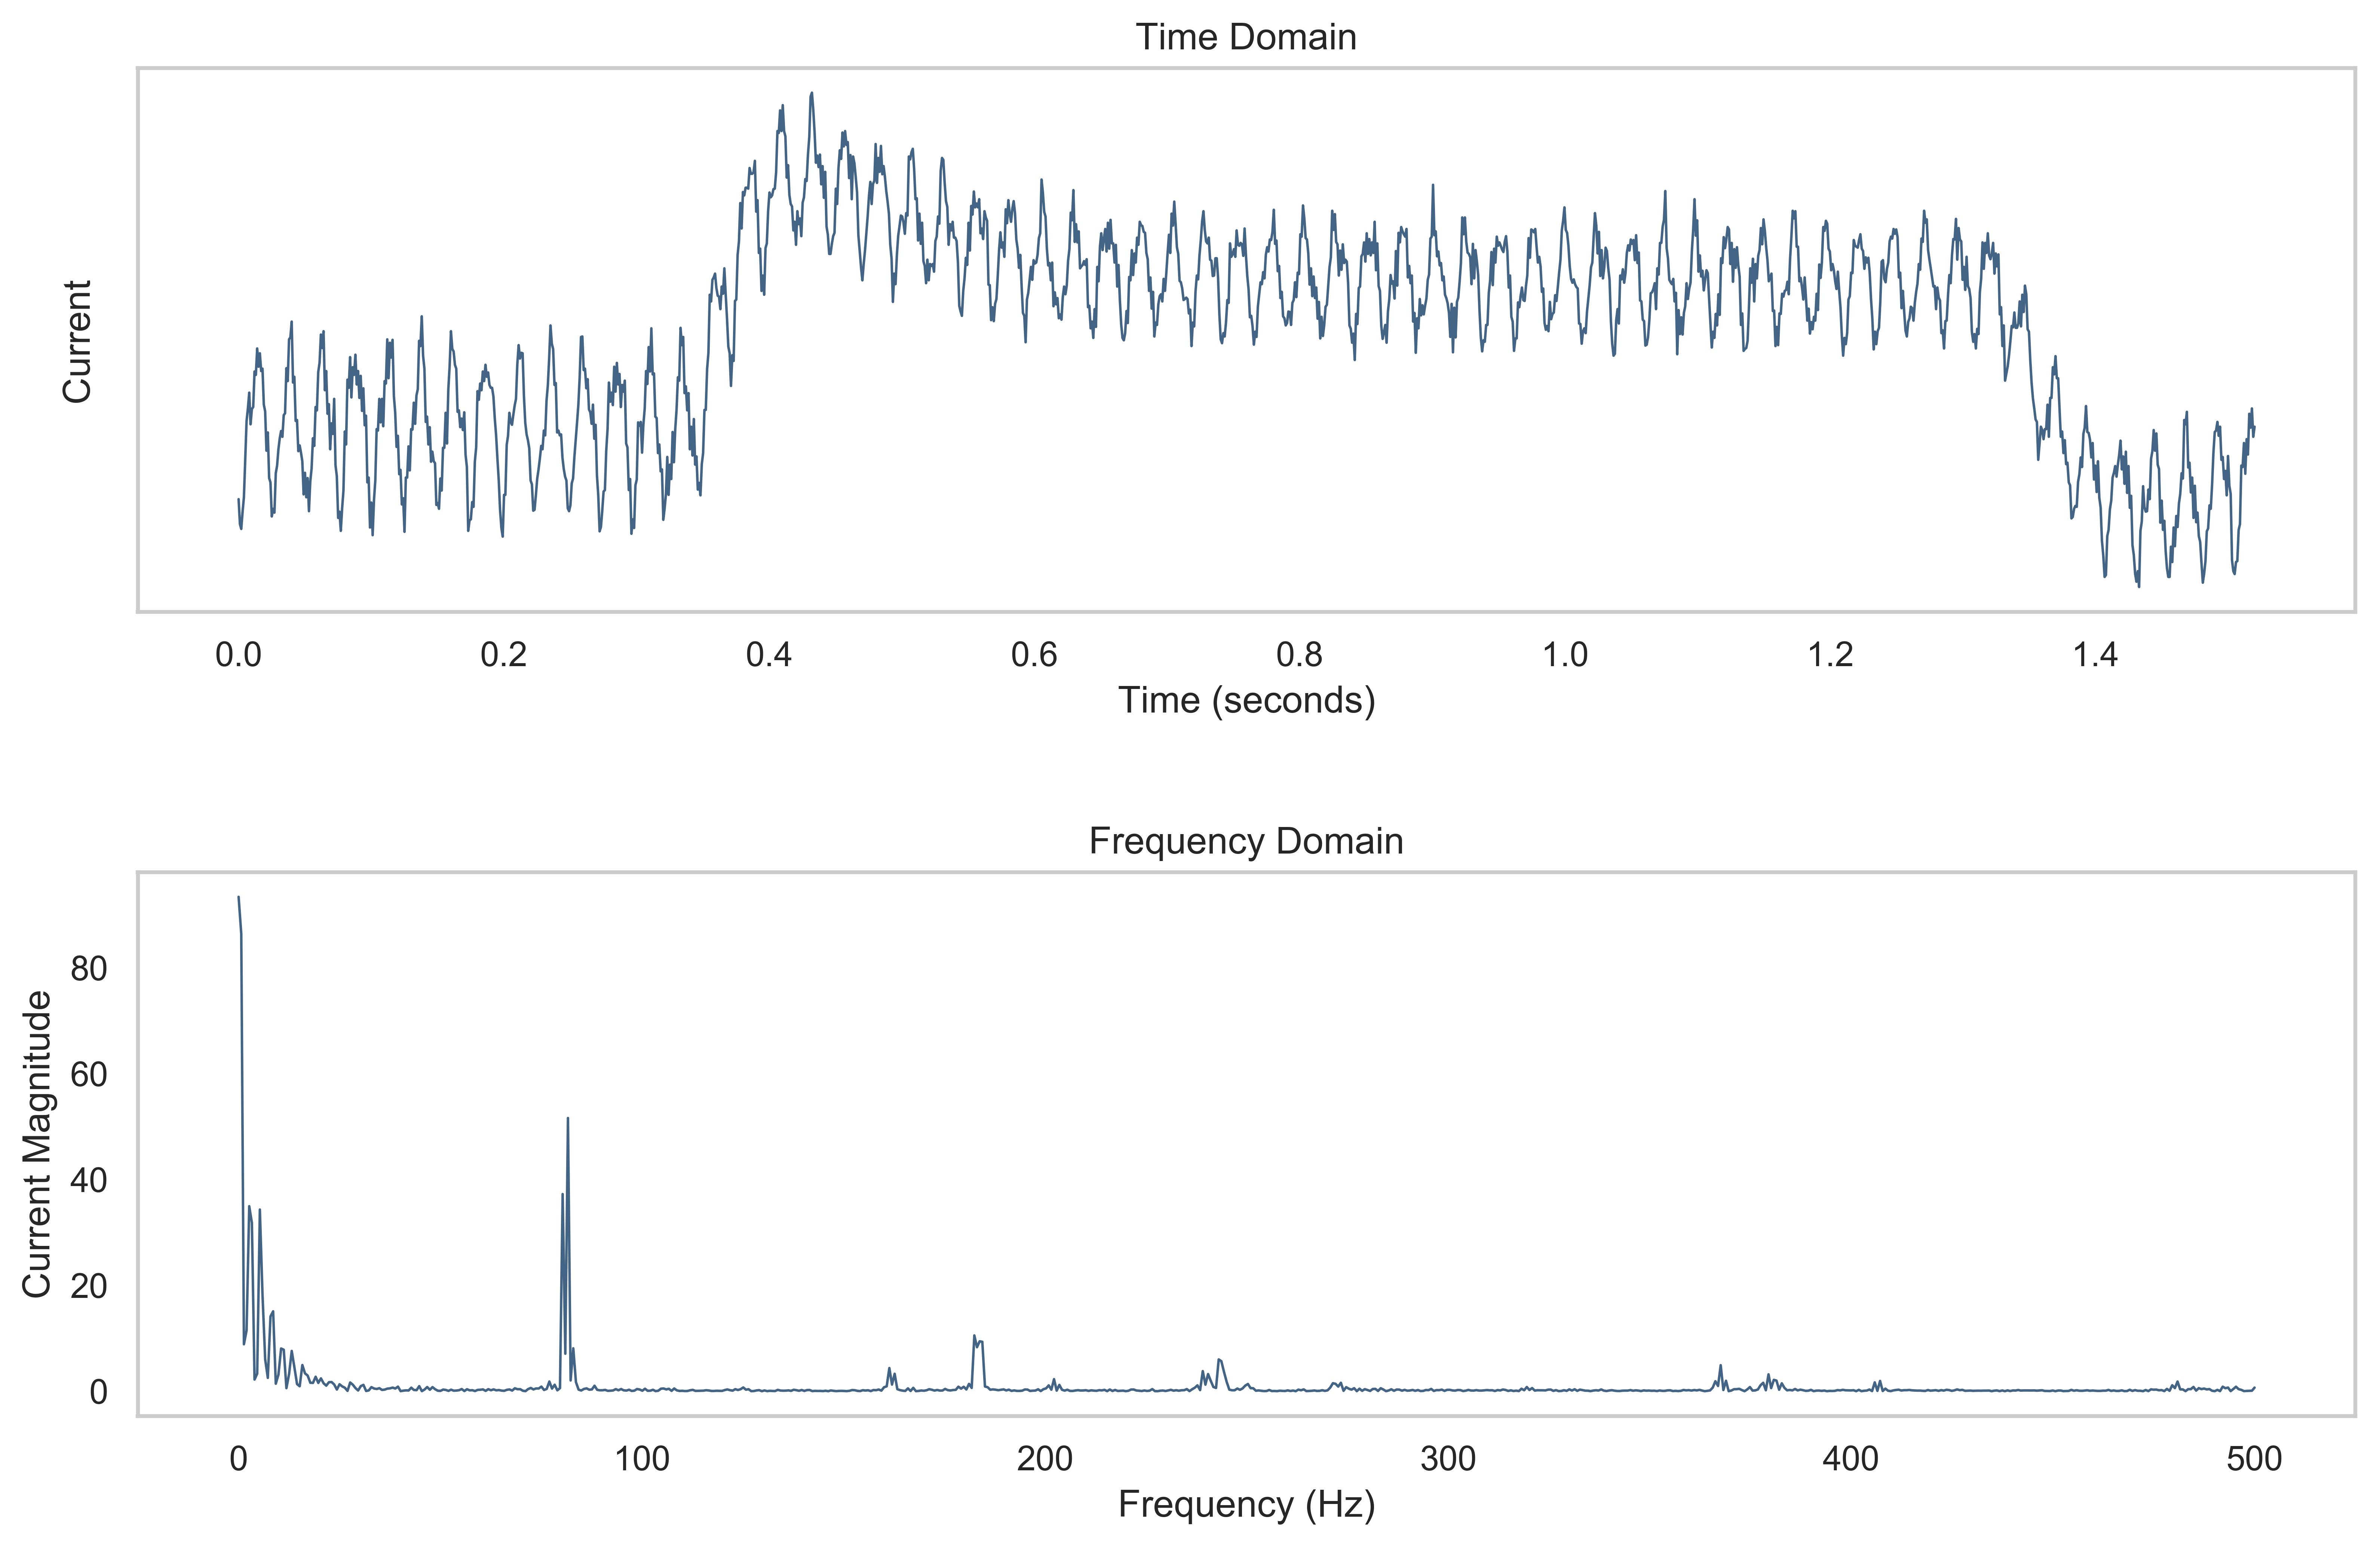

In [2]:
# load the current data from a csv
df = pd.read_csv("current.csv", index_col=False)
y = df["current"].to_numpy(dtype="float64")  # convert to a numpy array

# setup the seaborn plot
sns.set(font_scale=1.0, style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False, sharey=False, dpi=600)
fig.tight_layout(pad=5.0)

pal = sns.cubehelix_palette(6, rot=-0.25, light=0.7)  # pick nice color for plot

# parameters for plot
T = 1.0 / 1000.0  # sample spacing
N = len(y)  # number of sample points
x = np.linspace(0.0, N * T, N)

# plot time domain signal
axes[0].plot(x, y, marker="", label="Best model", color=pal[3], linewidth=0.8)
axes[0].set_title("Time Domain", fontdict={"fontweight": "normal"})
axes[0].set_xlabel("Time (seconds)")
axes[0].set_ylabel("Current")
axes[0].set_yticklabels([])

# do some preprocessing of the current signal
y = signal.detrend(y, type == "constant")  # detrended signal
y *= np.hamming(N)  # apply a hamming window. Why? https://dsp.stackexchange.com/a/11323

# FFT on time domain signal
yf = fftpack.rfft(y)
yf = 2.0 / N * np.abs(yf[: int(N / 2.0)])
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

# plot the frequency domain signal
axes[1].plot(xf, yf, marker="", label="Best model", color=pal[3], linewidth=0.8)
axes[1].set_title("Frequency Domain", fontdict={"fontweight": "normal"})
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Current Magnitude")

# clean up the sub-plots to make everything pretty
for ax in axes.flatten():
    ax.yaxis.set_tick_params(labelleft=True, which="major")
    ax.grid(False)

# in case you want to save the figure (just uncomment)
# plt.savefig('time_freq_domains.svg',dpi=600,bbox_inches = "tight")